In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
figdir = os.path.join(os.path.abspath(""), "..", "figures")

In [3]:
# Open the existing ocean zarr-store
ocn = xr.open_zarr(
    "gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/mom6.zarr",
    storage_options={"token": "anon"},
)
ocn

<xarray.Dataset> Size: 5TB
Dimensions:       (time: 43826, lat: 192, lon: 384, zl: 75, z_l: 75)
Coordinates:
    cftime        (time) object 351kB dask.array<chunksize=(21913,), meta=np.ndarray>
    ftime         (time) timedelta64[ns] 351kB dask.array<chunksize=(21913,), meta=np.ndarray>
  * lat           (lat) float64 2kB 89.82 88.89 87.95 ... -87.25 -88.18 -89.12
  * lon           (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * time          (time) datetime64[ns] 351kB 1993-12-31T18:00:00 ... 2023-12-31
  * z_l           (z_l) float64 600B 0.5154 1.571 2.687 ... 5.698e+03 5.902e+03
  * zl            (zl) float64 600B 1.0 3.0 5.0 ... 3.591e+03 5.111e+03
Data variables: (12/20)
    Heat_PmE      (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    LW            (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    LwLatSens     (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    SSH           (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    SW            (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    evap          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    ...            ...
    so            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    taux          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    tauy          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    temp          (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    uo            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    vo            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

In [4]:
# Open the existing atm zarr-store
atm = xr.open_zarr(
    "gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/03h-freq/zarr/fv3.zarr",
    storage_options={"token": "anon"},
)
atm

<xarray.Dataset> Size: 60TB
Dimensions:        (time: 87020, grid_yt: 192, grid_xt: 384, pfull: 127)
Coordinates:
    cftime         (time) object 696kB dask.array<chunksize=(21755,), meta=np.ndarray>
    ftime          (time) timedelta64[ns] 696kB dask.array<chunksize=(21755,), meta=np.ndarray>
  * grid_xt        (grid_xt) float64 3kB 0.0 0.9375 1.875 ... 357.2 358.1 359.1
  * grid_yt        (grid_yt) float64 2kB 89.82 88.89 87.95 ... -88.18 -89.12
  * pfull          (pfull) float32 508B 0.01278 0.02033 0.03177 ... 996.2 998.8
  * time           (time) datetime64[ns] 696kB 1993-12-31T18:00:00 ... 2023-1...
Data variables: (12/183)
    acond          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    albdo_ave      (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alnsf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alnwf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alvsf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alvwf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    ...             ...
    xtts           (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xu             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xv             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xz             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xzts           (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    zc             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

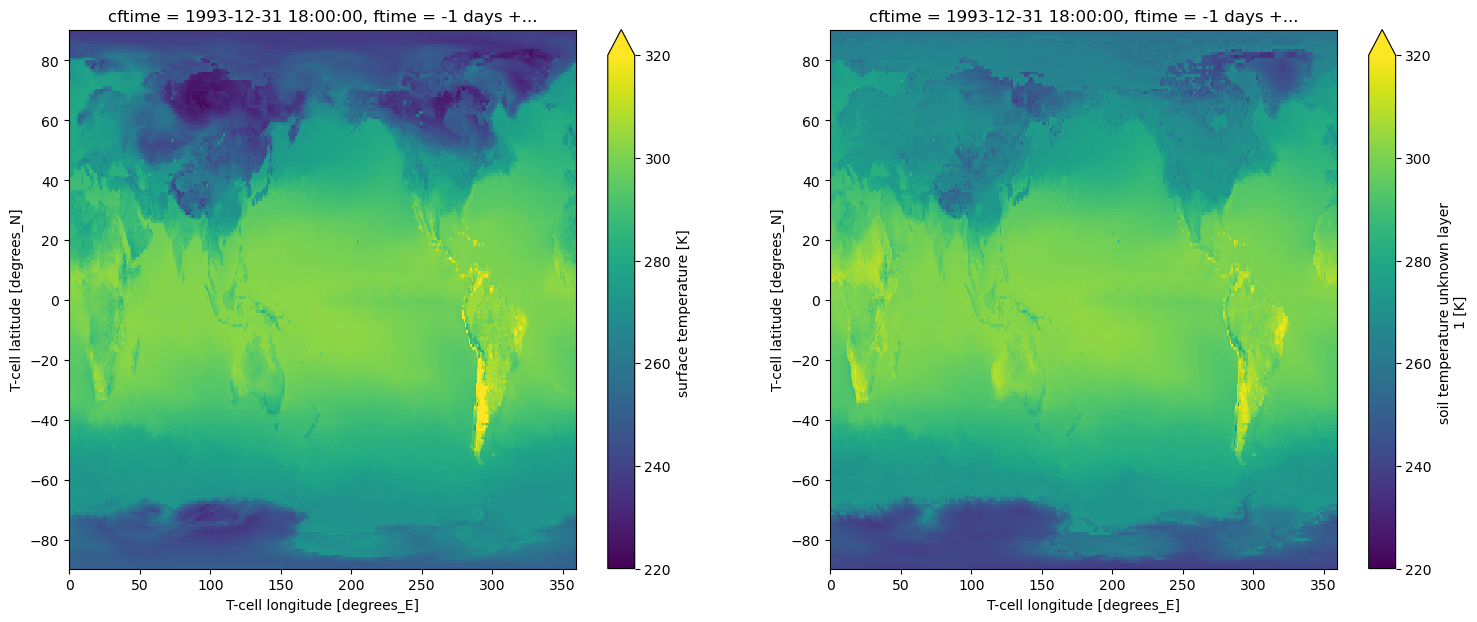

In [13]:
fig, ax = plt.subplots(1,2, figsize=(18,7))
atm.tmpsfc.isel(time=0).plot(ax=ax[0], vmin=220, vmax=320)
atm.soilt1.isel(time=0).plot(ax=ax[1], vmin=220, vmax=320)
plt.savefig(f"{figdir}/tmpsfc_soilt1_snapshots.png", dpi=300)
plt.show()

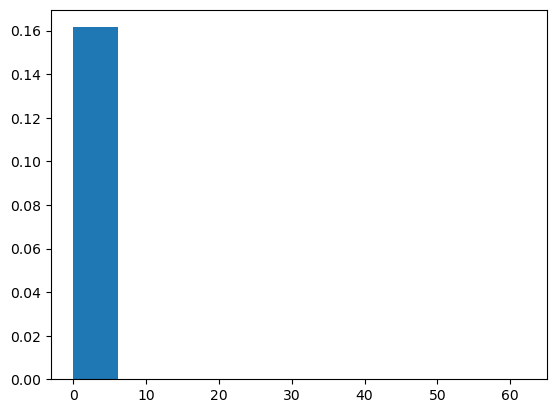

In [5]:
# check the distribution of ocean variables
plt.hist(np.ravel(atm.icetk), density=True)
plt.show()

## Sea Ice Variables

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
# ice concentration
ax[0,0].hist(np.ravel(atm.icec), density=True,)
ax[0,0].set_title("icec")
ax[0,1].hist(np.ravel(atm.icec.diff(dim="time")), density=True,)
ax[0,1].set_title("icec increments")

# ice thickness
ax[1,0].hist(np.ravel(atm.icetk), density=True,)
ax[1,0].set_title("icetk")
ax[1,1].hist(np.ravel(atm.icetk.diff(dim="time")), density=True,)
ax[1,1].set_title("icetk increments")
plt.suptitle(f"Ice Variables")

plt.savefig(f"{figdir}/ice_variables_dist_state+temp_increments.png", dpi=300)
plt.show()